In [11]:
from src.config import DATA_DIR, RESULTS_DIR, GREED_URL, FEES_URL
from src.load import get_yahoo_eth_data, get_fear_greed_data, get_daily_fees_data
from src.analyze import eda_plot, model_plot, eth_plot, fear_plot, tran_plot, daily_plot, heat_plot
from src.process import merge_data, clean_data_and_feature_engineering, modeling

# 1. Get the Three Datasets

In [12]:
get_yahoo_eth_data()
get_fear_greed_data(GREED_URL)
get_daily_fees_data(FEES_URL)

/Users/yunhuidong/Desktop/finalp/src/load.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download("ETH-USD", start=start_date)
[*********************100%***********************]  1 of 1 completed


Yahoo ETH data loaded successfully.
Fear & Greed Index data loaded successfully.
Daily fees data loaded successfully.


# 2. Merge the Three Datasets

In [13]:
merge_data()

/Users/yunhuidong/Desktop/finalp/src/process.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eth = yf.download("ETH-USD", start=start_date)
[*********************100%***********************]  1 of 1 completed

Common date range: 2024-07-27 00:00:00 → 2025-12-07 00:00:00
Rows after merge: 499
        date         Open         High          Low        Close       Volume  \
0 2024-07-27  3275.891602  3327.426514  3195.356689  3247.607910  15198233287   
1 2024-07-28  3247.507324  3283.152100  3201.763184  3271.464600   8959236446   
2 2024-07-29  3271.453369  3396.625732  3257.715576  3320.539307  18334852719   
3 2024-07-30  3320.635254  3365.322510  3235.760010  3278.667725  14045773047   
4 2024-07-31  3278.686523  3347.636475  3216.071777  3231.295654  16135380637   

   value       fee  
0     63   9440160  
1     63   8713097  
2     63   9753110  
3     61  10169124  
4     60  11179690   
           date         Open         High          Low        Close  \
494 2025-12-03  2997.801514  3212.559814  2988.142090  3191.571777   
495 2025-12-04  3188.343506  3238.555420  3071.310059  3134.316406   
496 2025-12-05  3134.357422  3192.457031  2989.831543  3024.432861   
497 2025-12-06  3024.4

# 3. Data Cleaning

In [14]:
clean_data_and_feature_engineering()

Loaded merged dataset: (499, 8)
        date         Open         High          Low        Close       Volume  \
0 2024-07-27  3275.891602  3327.426514  3195.356689  3247.607910  15198233287   
1 2024-07-28  3247.507324  3283.152100  3201.763184  3271.464600   8959236446   
2 2024-07-29  3271.453369  3396.625732  3257.715576  3320.539307  18334852719   
3 2024-07-30  3320.635254  3365.322510  3235.760010  3278.667725  14045773047   
4 2024-07-31  3278.686523  3347.636475  3216.071777  3231.295654  16135380637   

   value       fee  
0     63   9440160  
1     63   8713097  
2     63   9753110  
3     61  10169124  
4     60  11179690  

===== Missing Value Check =====
date      0
Open      0
High      0
Low       0
Close     0
Volume    0
value     0
fee       0
dtype: int64

===== Final Clean Dataset Shape =====
(485, 21)
        date         Open         High          Low        Close       Volume  \
0 2024-08-03  2985.950928  3015.296143  2861.177490  2903.385742  17844091431   
1 

# 4. EDA

## Ethereum Price
ETH experienced large fluctuations over the 500-day period, dropping sharply in early 2025, rebounding strongly mid-year and entering another decline toward late 2025.

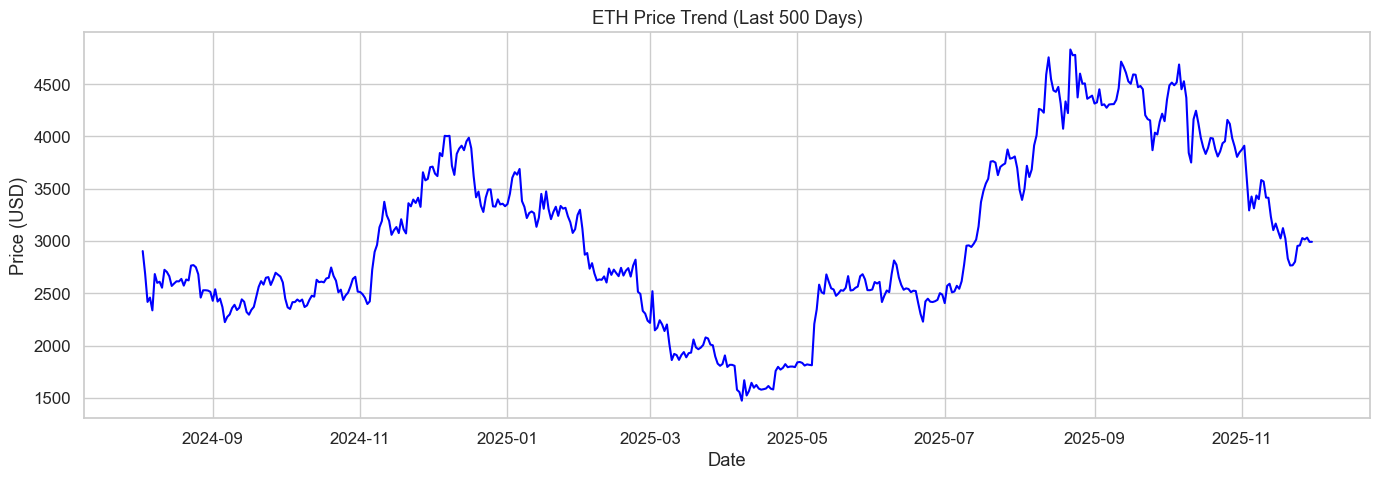

Saved plot in ./results/


In [15]:
eth_plot()

## Fear & Greed Index
Investor sentiment showed repeated cycles of fear and greed, with sharp dips often aligning with market pullbacks and steady recoveries during price rebounds.

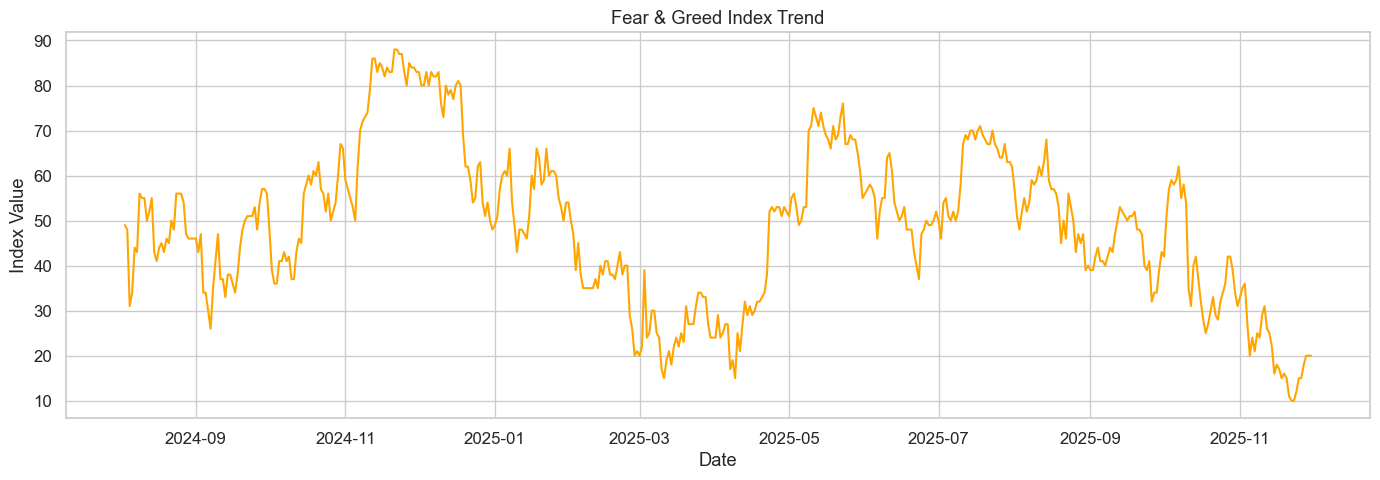

Saved plot in ./results/


In [16]:
fear_plot()

## Transaction Fees
Daily transaction fees fluctuated heavily indicating several periods of intense on-chain activity (often preceding short-term volatility in ETH price).

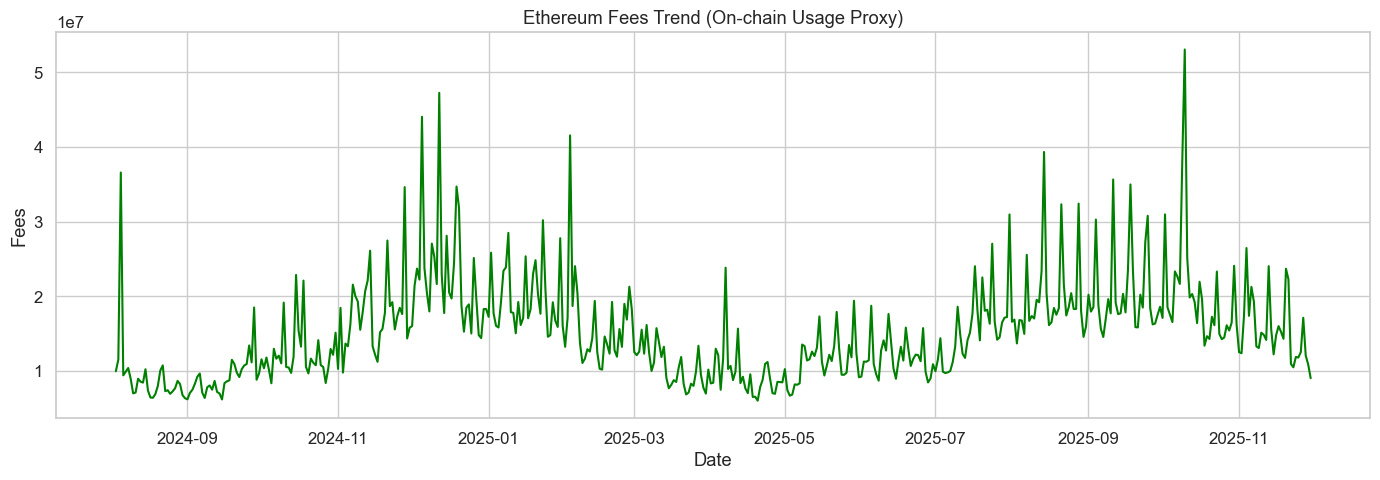

Saved plot in ./results/


In [17]:
tran_plot()

## Distribution of Daily Returns
Daily returns follow a heavy-tailed distribution, with many small moves and occasional jumps. 

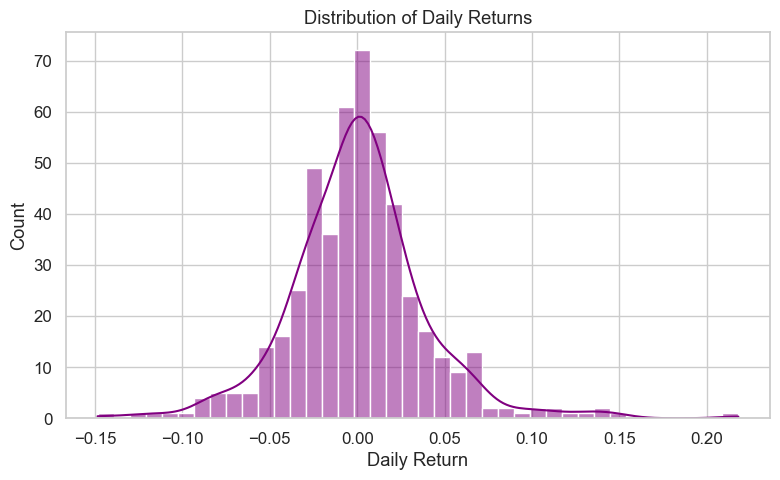

Saved plot in ./results/


In [18]:
daily_plot()

## Correlation Heatmap of All Features
Strong correlations exist among price-based features.
On-chain and sentiment features have weaker correlations (complementary but noisy signals).

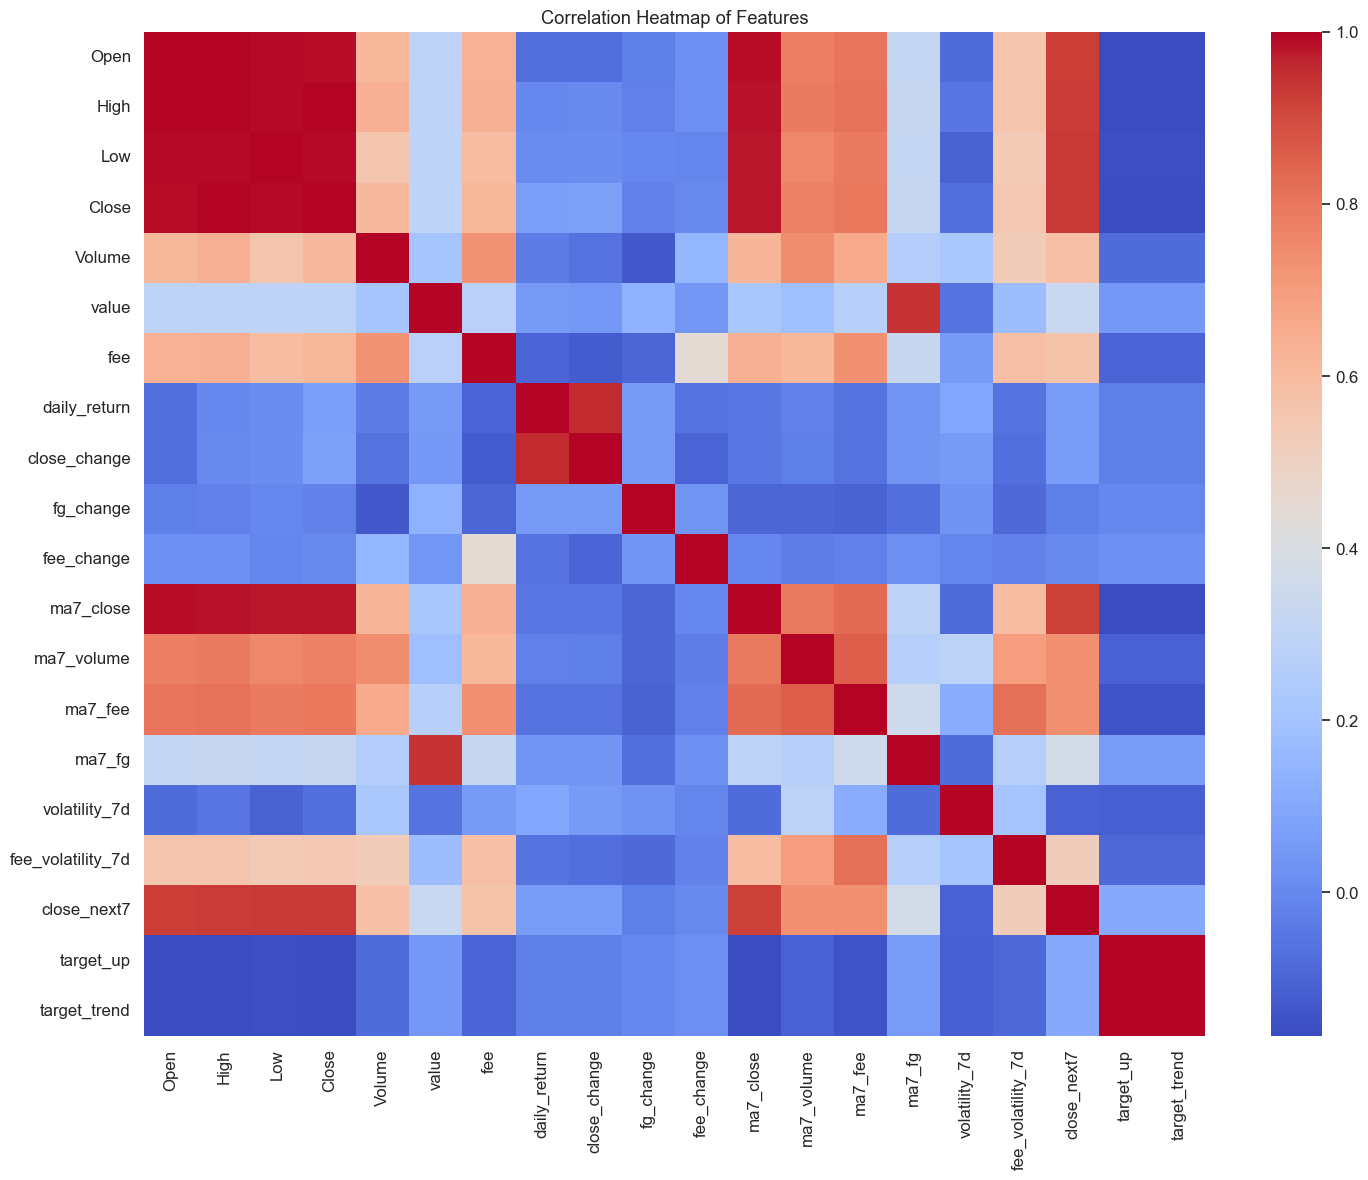

Saved plot in ./results/


In [19]:
heat_plot()

# 5. Model Training and Evaluation

Evaluation including precision, recall, f1-score, support for both Logistic Regression and Random Forest is shown in the terminal.

In [21]:
modeling()

Dataset shape: (485, 21)
Columns: ['date', 'Open', 'High', 'Low', 'Close', 'Volume', 'value', 'fee', 'daily_return', 'close_change', 'fg_change', 'fee_change', 'ma7_close', 'ma7_volume', 'ma7_fee', 'ma7_fg', 'volatility_7d', 'fee_volatility_7d', 'close_next7', 'target_up', 'target_trend']
        date         Open         High          Low        Close       Volume  \
0 2024-08-03  2985.950928  3015.296143  2861.177490  2903.385742  17844091431   
1 2024-08-04  2903.088623  2931.471680  2639.566650  2686.398926  21139601426   
2 2024-08-05  2686.027588  2695.886719  2122.546143  2417.206299  67668132244   
3 2024-08-06  2417.269775  2553.581055  2416.527100  2458.723877  26041995921   
4 2024-08-07  2458.989014  2551.560791  2312.168701  2336.589355  24264218606   

   value       fee  daily_return  close_change  ...  fee_change    ma7_close  \
0     49   9980706     -0.027671    -82.627441  ...  -6000978.0  3170.418666   
1     48  11536212     -0.074736   -216.986816  ...   1555506.0

# 6. Results and Analysis

Confusion matrix shows the difficulty of predicting ‘up’ weeks.

Feature importances figures for both models show:
- On-chain and sentiment signals (MA7 fees, MA7 FG, volatility) rank among the strongest predictors.
- Random Forest captures non-linear relationships, while Logistic Regression reveals weak but interpretable linear effects.

Predicted probability distribution: predicted probabilities cluster around 0.5–0.7, showing limited confidence due to noisy short-term signals.

True vs Predicted figure: timeline comparison reveals frequent mismatches, especially during trend reversals or high-volatility periods. Model tends to overpredict ‘up’ movements, reflecting crypto’s upward bias but also creating false positives.

Total rows: 485
Date range: 2024-08-03 00:00:00 → 2025-11-30 00:00:00

Train size: (388, 17) | Test size: (97, 17)
Train date range: 2024-08-03 00:00:00 → 2025-08-25 00:00:00
Test  date range: 2025-08-26 00:00:00 → 2025-11-30 00:00:00

========== Logistic Regression ==========
              precision    recall  f1-score   support

           0       0.50      0.08      0.14        62
           1       0.34      0.86      0.49        35

    accuracy                           0.36        97
   macro avg       0.42      0.47      0.32        97
weighted avg       0.44      0.36      0.27        97

========== Random Forest ==========
              precision    recall  f1-score   support

           0       0.63      0.52      0.57        62
           1       0.35      0.46      0.40        35

    accuracy                           0.49        97
   macro avg       0.49      0.49      0.48        97
weighted avg       0.53      0.49      0.50        97

Saved: ./results/confusion_matri

<Figure size 500x400 with 0 Axes>

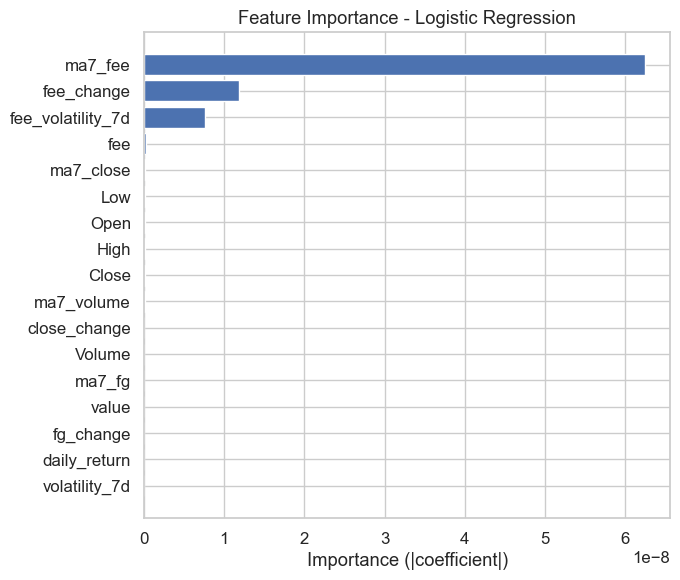

Saved: ./results/feature_importance_logistic.png


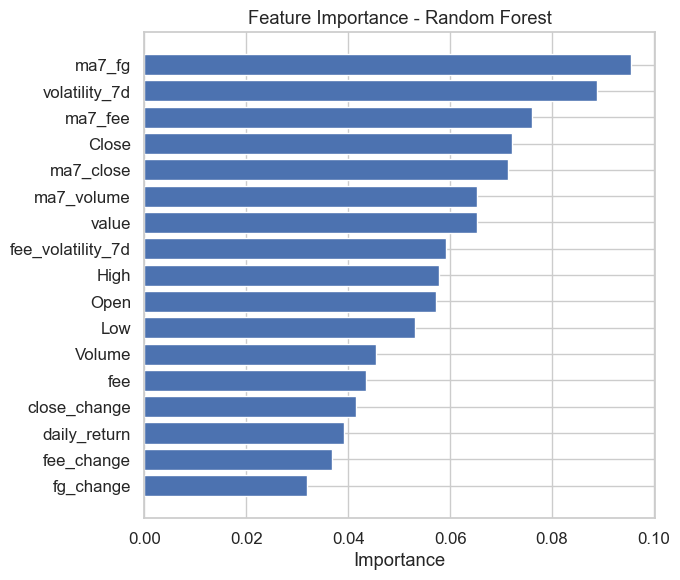

Saved: ./results/feature_importance_rf.png


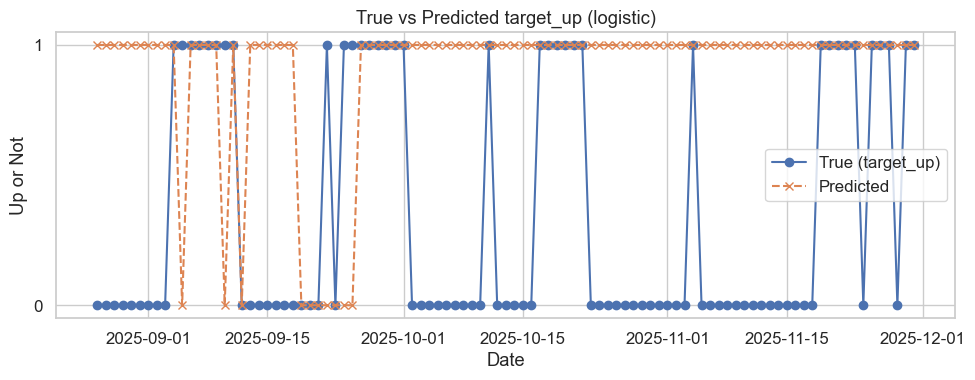

Saved: ./results/true_vs_pred_logistic.png


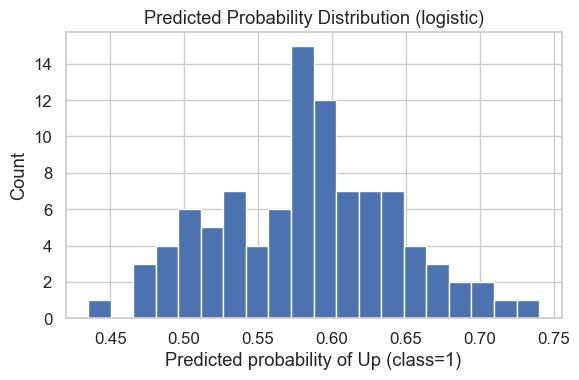

Saved: ./results/proba_hist_logistic.png

All model analysis figures saved in: ./results


In [22]:
model_plot()